In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/mbraaksma/Files/advgeocomp2024/advgeocomp2024/mvp02':
  os.chdir(r'/Users/mbraaksma/Files/advgeocomp2024/advgeocomp2024/mvp02')

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/var/folders/ph/3yncn97j65s8dssq7h8rh48c0000gn/T/ipykernel_13322/2465086091.py:24: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



{"/Users/mbraaksma/mambaforge/envs/geovenv1/lib/python3.10/importlib/_bootstrap.py": 1687560340.4663458, "/Users/mbraaksma/mambaforge/envs/geovenv1/lib/python3.10/importlib/_bootstrap_external.py": 1687560340.4713864, "/Users/mbraaksma/mambaforge/envs/geovenv1/lib/python3.10/codecs.py": 1687560337.7702909, "/Users/mbraaksma/mambaforge/envs/geovenv1/lib/python3.10/encodings/aliases.py": 1687560339.1612759, "/Users/mbraaksma/mambaforge/envs/geovenv1/lib/python3.10/encodings/__init__.py": 1687560339.155254, "/Users/mbraaksma/mambaforge/envs/geovenv1/lib/python3.10/encodings/utf_8.py": 1687560339.8500874, "/Users/mbraaksma/mambaforge/envs/geovenv1/lib/python3.10/abc.py": 1687560337.6272814, "/Users/mbraaksma/mambaforge/envs/geovenv1/lib/python3.10/io.py": 1687560337.9073498, "/Users/mbraaksma/mambaforge/envs/geovenv1/lib/python3.10/stat.py": 1687560338.0990865, "/Users/mbraaksma/mambaforge/envs/geovenv1/lib/python3.10/_collections_abc.py": 1687560337.5845973, "/Users/mbraaksma/mambaforge/e

In [2]:
# Standard Library Imports
import os
import numpy as np

# Data Visualization Imports
import matplotlib.pyplot as plt

# Geospatial Data Imports
from osgeo import gdal
import geopandas as gpd
import rasterio
from rasterio.features import rasterize

# Machine Learning Imports
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Set dir
# Define the path to your working directory
data_dir = '../../../base_data/advgeocomp2024/mvp02'
data_dir_land_supply = '../../../base_data/land_supply'
os.makedirs(data_dir, exist_ok=True)

In [3]:
# Raster paths
base_raster_paths = [
    os.path.join(data_dir_land_supply, 'anntotprecip/anntotprecip'),
    os.path.join(data_dir_land_supply, 'builtupland/builtupland'),
    os.path.join(data_dir_land_supply, 'elevation/elevation'),
    os.path.join(data_dir_land_supply, 'gl-croplands-geotif/cropland.tif'),
    os.path.join(data_dir_land_supply, 'HWSD2_RASTER/HWSD2.bil'),
    os.path.join(data_dir_land_supply, 'irragland/irragland'),
    os.path.join(data_dir_land_supply, 'minutes_to_market/minutes_to_market_10s.tif'), # replacement market access file
    os.path.join(data_dir_land_supply, 'potentialveg/potveg'),
    os.path.join(data_dir_land_supply, 'soilcarbon/soilcarbon'),
    os.path.join(data_dir_land_supply, 'SOILPH/soilph')
]

# Corresponding target paths
target_raster_paths = [
    os.path.join(data_dir_land_supply, 'aligned/anntotprecip.tif'),
    os.path.join(data_dir_land_supply, 'aligned/builtupland.tif'),
    os.path.join(data_dir_land_supply, 'aligned/elevation.tif'),
    os.path.join(data_dir_land_supply, 'aligned/cropland.tif'),
    os.path.join(data_dir_land_supply, 'aligned/HWSD2.tif'),
    os.path.join(data_dir_land_supply, 'aligned/irragland.tif'),
    os.path.join(data_dir_land_supply, 'aligned/minutes_to_market_10s.tif'),
    os.path.join(data_dir_land_supply, 'aligned/potentialveg.tif'),
    os.path.join(data_dir_land_supply, 'aligned/soilcarbon.tif'),
    os.path.join(data_dir_land_supply, 'aligned/SOILPH.tif')
]

# Create the target directory if it doesn't exist
if not os.path.exists(os.path.join(data_dir_land_supply, 'aligned')):
    os.mkdir(os.path.join(data_dir_land_supply, 'aligned'))

# Loop through the base rasters and apply the gdal.Warp function
for base_raster_path, target_raster_path in zip(base_raster_paths, target_raster_paths):
    # Debugging output for paths
    print(f'Checking: {base_raster_path}')  # Added line for debugging
    
    # Check if the base raster path exists
    if os.path.exists(base_raster_path):  # Check for the folder
        print(f'Processing: {base_raster_path}')
        
        # Using gdal.Warp to reproject and resize
        gdal.Warp(
            target_raster_path,
            base_raster_path,
            xRes=0.7,
            yRes=0.7,
            resampleAlg='bilinear',
            # outputBounds=[-68.5, -17.5, -65.5, -15.5],  # Bounding box around La Paz, Bolivia            
            dstSRS='EPSG:4326'  
        )
        print(f'Successfully created: {target_raster_path}')
    else:
        print(f'Warning: {base_raster_path} does not exist or is not a valid file.')

print("All rasters have been processed.")

Checking: ../../../base_data/land_supply/anntotprecip/anntotprecip
Processing: ../../../base_data/land_supply/anntotprecip/anntotprecip


Successfully created: ../../../base_data/land_supply/aligned/anntotprecip.tif
Checking: ../../../base_data/land_supply/builtupland/builtupland
Processing: ../../../base_data/land_supply/builtupland/builtupland
Successfully created: ../../../base_data/land_supply/aligned/builtupland.tif
Checking: ../../../base_data/land_supply/elevation/elevation
Processing: ../../../base_data/land_supply/elevation/elevation


Successfully created: ../../../base_data/land_supply/aligned/elevation.tif
Checking: ../../../base_data/land_supply/gl-croplands-geotif/cropland.tif
Processing: ../../../base_data/land_supply/gl-croplands-geotif/cropland.tif
Successfully created: ../../../base_data/land_supply/aligned/cropland.tif
Checking: ../../../base_data/land_supply/HWSD2_RASTER/HWSD2.bil
Processing: ../../../base_data/land_supply/HWSD2_RASTER/HWSD2.bil


Successfully created: ../../../base_data/land_supply/aligned/HWSD2.tif
Checking: ../../../base_data/land_supply/irragland/irragland
Processing: ../../../base_data/land_supply/irragland/irragland
Successfully created: ../../../base_data/land_supply/aligned/irragland.tif
Checking: ../../../base_data/land_supply/minutes_to_market/minutes_to_market_10s.tif
Processing: ../../../base_data/land_supply/minutes_to_market/minutes_to_market_10s.tif
Successfully created: ../../../base_data/land_supply/aligned/minutes_to_market_10s.tif
Checking: ../../../base_data/land_supply/potentialveg/potveg
Processing: ../../../base_data/land_supply/potentialveg/potveg
Successfully created: ../../../base_data/land_supply/aligned/potentialveg.tif
Checking: ../../../base_data/land_supply/soilcarbon/soilcarbon
Processing: ../../../base_data/land_supply/soilcarbon/soilcarbon
Successfully created: ../../../base_data/land_supply/aligned/soilcarbon.tif
Checking: ../../../base_data/land_supply/SOILPH/soilph
Processing

In [4]:
# Load shapefile
ecos_path = os.path.join(data_dir, 'TerrestrialEcos')
gdf = gpd.read_file(ecos_path)

# Define the eco_names and their observed values from the x-axis of the image
# Replace these with the actual observed values
eco_name_observed_values = {
    'Araucaria moist forests': 0.12,
    'Alto Paraná Atlantic forests': 0.15,
    'Uruguayan savanna': 0.18,
    'Llanos': 0.10,
    'Espinal': 0.08,
    'Humid Pampas': 0.07,
    'Humid Chaco': 0.09,
    'Peten–Veracruz moist forests': 0.05,
    'Chiquitano dry forests': 0.03,
    'Dry Chaco': 0.20,
    'Cerrado': 0.25,
    'Mato Grosso seasonal forests': 0.60
}

# Filter the GeoDataFrame to include only the specified eco_names
subset_gdf = gdf[gdf['ECO_NAME'].isin(eco_name_observed_values.keys())]

# Add a new column 'observed_value' with the corresponding x-axis observed values
subset_gdf['observed_value'] = subset_gdf['ECO_NAME'].map(eco_name_observed_values)

# Load the template raster file
# Replace 'template_raster_path.tif' with the path to your reference raster file
with rasterio.open(target_raster_paths[0]) as src:
    template_meta = src.meta.copy()
    template_shape = src.shape
    template_transform = src.transform

# Prepare geometries and values for rasterization
# Each geometry should have its 'observed_value' mapped to it
shapes = ((geom, value) for geom, value in zip(subset_gdf.geometry, subset_gdf['observed_value']))

# Rasterize using the template raster's shape and transform
rasterized_data = rasterize(
    shapes=shapes,
    out_shape=template_shape,
    transform=template_transform,
    fill=0,  # background value, e.g., 0 for no data
    dtype='float32'  # use a suitable data type
)

# Update metadata to match the output raster
output_meta = template_meta.copy()
output_meta.update({"dtype": 'float32', "count": 1})

# Save the rasterized output to a new file
output_path = os.path.join(data_dir, 'rasterized_ecos.tif')
with rasterio.open(output_path, 'w', **output_meta) as dst:
    dst.write(rasterized_data, 1)

/Users/mbraaksma/mambaforge/envs/geovenv1/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/Users/mbraaksma/Files/base_data/land_supply/aligned/anntotprecip.tif (257, 514)
/Users/mbraaksma/Files/base_data/land_supply/aligned/elevation.tif (257, 514)
/Users/mbraaksma/Files/base_data/land_supply/aligned/cropland.tif (257, 514)
/Users/mbraaksma/Files/base_data/land_supply/aligned/HWSD2.tif (257, 514)
/Users/mbraaksma/Files/base_data/land_supply/aligned/irragland.tif (257, 514)
/Users/mbraaksma/Files/base_data/land_supply/aligned/minutes_to_market_10s.tif (257, 514)
/Users/mbraaksma/Files/base_data/land_supply/aligned/potentialveg.tif (257, 514)
/Users/mbraaksma/Files/base_data/land_supply/aligned/soilcarbon.tif (257, 514)
/Users/mbraaksma/Files/base_data/land_supply/aligned/SOILPH.tif (257, 514)
Found a valid square area without zero values in the outcome raster.


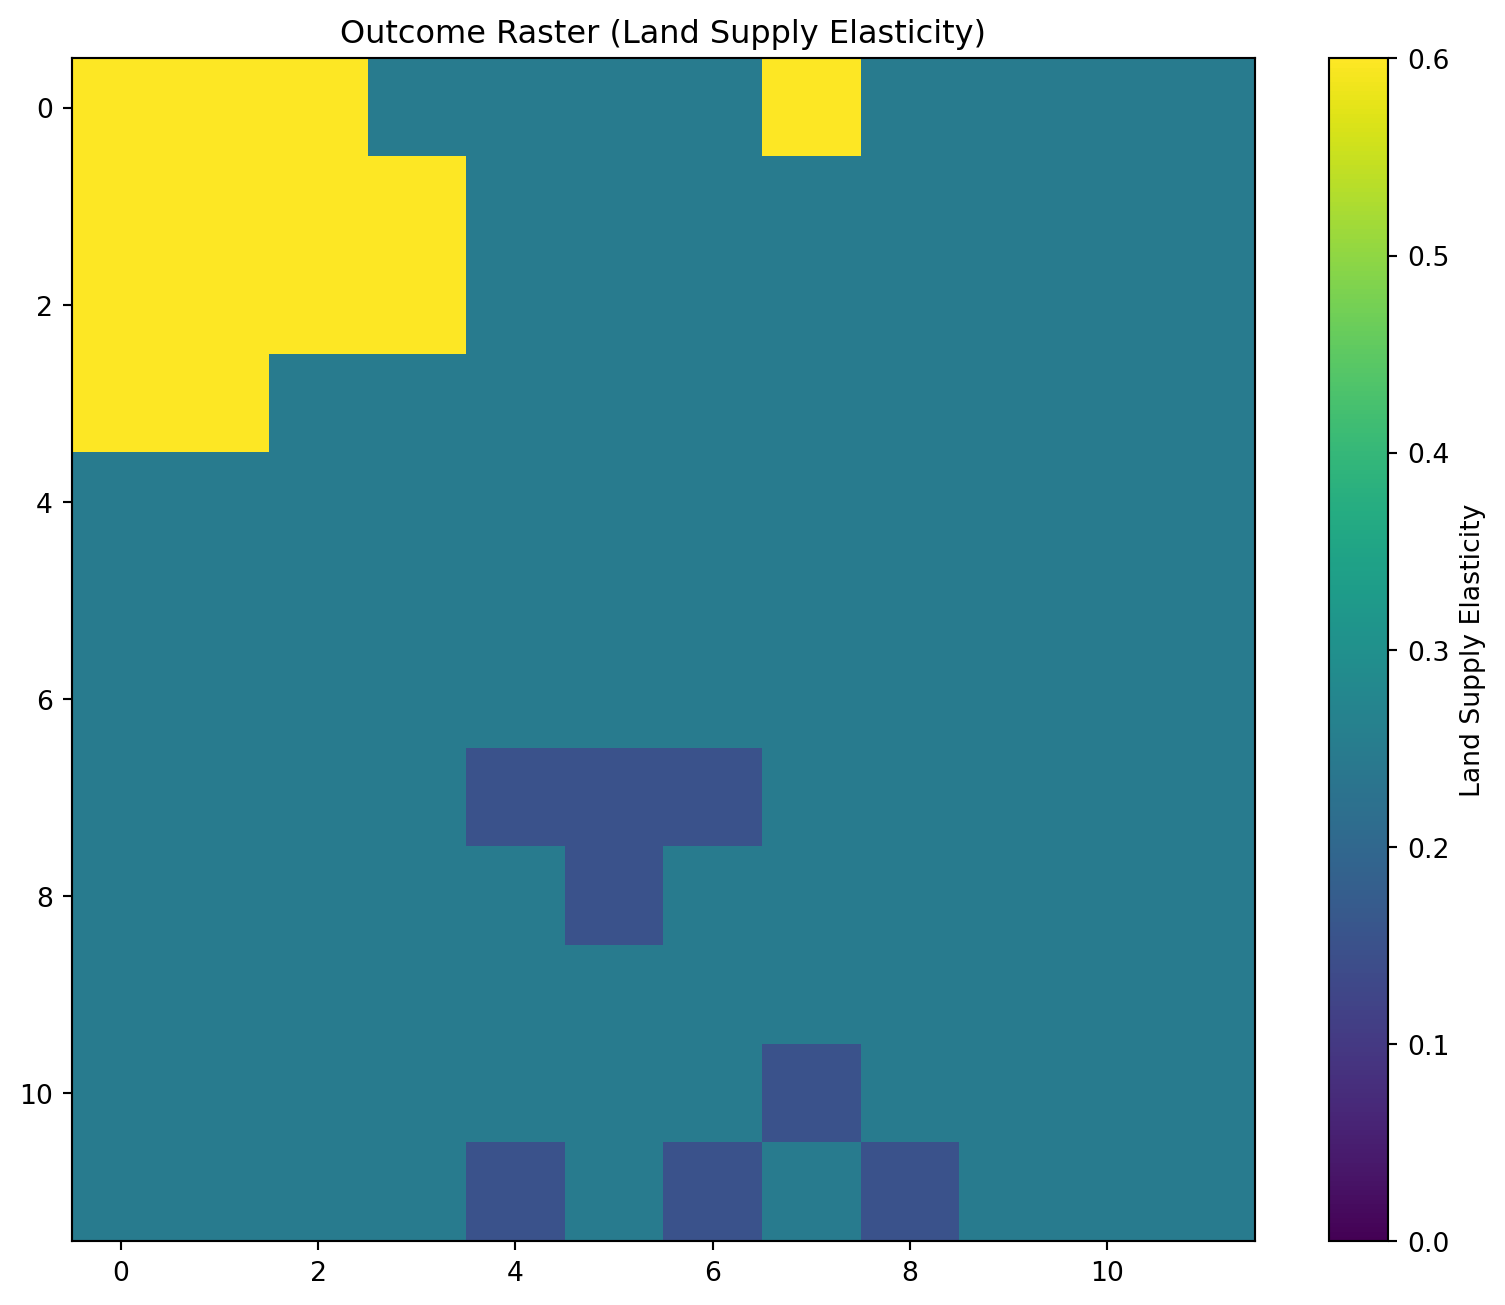

In [5]:
def load_raster(raster_path):
    dataset = gdal.Open(raster_path)
    array = dataset.ReadAsArray()
    return array

def load_and_stack_rasters(raster_paths):
    raster_stack = []
    for path in raster_paths:
        array = load_raster(path)
        raster_stack.append(array)
        print(path, array.shape)
    # Stack along a new axis for CNN input (height, width, channels)
    return np.stack(raster_stack, axis=-1)

# Load all rasters
data_dir = '/Users/mbraaksma/Files/base_data/land_supply'
raster_paths = [
    os.path.join(data_dir, 'aligned/anntotprecip.tif'),
    # os.path.join(data_dir, 'aligned/builtupland.tif'),
    os.path.join(data_dir, 'aligned/elevation.tif'),
    os.path.join(data_dir, 'aligned/cropland.tif'),
    os.path.join(data_dir, 'aligned/HWSD2.tif'),
    os.path.join(data_dir, 'aligned/irragland.tif'),
    os.path.join(data_dir, 'aligned/minutes_to_market_10s.tif'),
    os.path.join(data_dir, 'aligned/potentialveg.tif'),
    os.path.join(data_dir, 'aligned/soilcarbon.tif'),
    os.path.join(data_dir, 'aligned/SOILPH.tif')
]
raster_stack = load_and_stack_rasters(raster_paths)

def find_square_with_complete_outcome(outcome_raster, raster_stack, square_size):
    height, width = outcome_raster.shape
    x_max_start = width - square_size
    y_max_start = height - square_size
    
    for y_start in range(0, y_max_start + 1, square_size):
        for x_start in range(0, x_max_start + 1, square_size):
            outcome_square = outcome_raster[y_start:y_start + square_size, x_start:x_start + square_size]
            
            # Treat zeros as "missing" data
            has_missing_data = (outcome_square == 0).any()
            
            if not has_missing_data:
                predictor_square = raster_stack[y_start:y_start + square_size, x_start:x_start + square_size, :]
                return predictor_square, outcome_square
    
    raise ValueError("No square region without zero values in the outcome raster was found.")

# Load and plot the outcome raster
outcome_raster_path = '/Users/mbraaksma/Files/base_data/advgeocomp2024/mvp02/rasterized_ecos.tif'
outcome_raster = load_raster(outcome_raster_path)

# Example usage: Find a 64x64 area without zero values in the outcome
square_size = 12
try:
    predictor_square, outcome_square = find_square_with_complete_outcome(outcome_raster, raster_stack, square_size)
    print("Found a valid square area without zero values in the outcome raster.")
    plt.figure(figsize=(10, 8))
    plt.imshow(outcome_square, cmap='viridis', vmin=np.min(outcome_raster), vmax=np.max(outcome_raster))
    plt.colorbar(label='Land Supply Elasticity')
    plt.title('Outcome Raster (Land Supply Elasticity)')
    plt.show()
except ValueError as e:
    print(e)

In [6]:
# Assuming `predictor_square` and `outcome_square` are lists of extracted squares
predictor_squares = np.array(predictor_square)  # Shape: (num_samples, square_size, square_size, num_rasters)
outcome_squares = np.array(outcome_square)      # Shape: (num_samples, 1)

# Add a channel dimension to predictor_squares if it's missing
predictor_squares = np.expand_dims(predictor_squares, axis=-1)  # Adding channel dimension (if needed)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(predictor_squares, outcome_squares, test_size=0.2, random_state=42)

# Ensure y_train is 2D (num_samples, 1)
y_train = np.expand_dims(y_train, axis=-1)  # Ensure it's a 2D array (num_samples, 1)

# Define the CNN model architecture
def build_cnn_model(input_shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
        
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
        
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.GlobalAveragePooling2D(),
        
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)  # Single output for regression
    ])
    return model

# Build the model
input_shape = X_train.shape[1:]  # (square_size, square_size, num_rasters)
model = build_cnn_model(input_shape)

# Compile the model for regression
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
epochs = 8
batch_size = 16
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# # Evaluate the model on the test data
# test_loss, test_mae = model.evaluate(X_test, y_test)
# print(f"Test Mean Absolute Error: {test_mae}")

# # Predict on new data (example)
# predictions = model.predict(X_test)

Epoch 1/8


/Users/mbraaksma/mambaforge/envs/geovenv1/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step - loss: inf - mae: 2382834682970333540257065619813302272.0000

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step - loss: inf - mae: 2382834682970333540257065619813302272.0000 - val_loss: nan - val_mae: nan


Epoch 2/8


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: nan - mae: nan

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan


Epoch 3/8


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan - mae: nan

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan


Epoch 4/8


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan - mae: nan

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan


Epoch 5/8


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan - mae: nan

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan


Epoch 6/8


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: nan - mae: nan

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan


Epoch 7/8


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan - mae: nan

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan


Epoch 8/8


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan - mae: nan

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
